<a href="https://colab.research.google.com/github/lfaferreira/analise_desempenho_mercado_acoes/blob/main/An%C3%A1lise_de_desempenho_do_mercado_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import plotly.express as px
import mplfinance as mpf

#Coleta de dados

In [2]:
# Função para coletar dados das ações
def coletar_dados_acoes(empresas, data_inicial, data_final):
    historico_acoes = []

    for empresa in empresas:
        try:
            info = yf.download(empresa, start=data_inicial, end=data_final)
            historico_acoes.append(info)
        except Exception as e:
            print(f"Erro ao coletar dados da empresa {empresa}: {str(e)}")

    if len(historico_acoes) == 0:
        return None

    dados_acoes = pd.concat(historico_acoes, keys=empresas, names=['Ticker', 'Date'])
    dados_acoes = dados_acoes.reset_index()
    return dados_acoes

In [3]:
# Periodo da analise
data_inicial = datetime.now() - pd.DateOffset(months=3)
data_final = datetime.now()

print(f'Inicio: {data_inicial}\nFim:    {data_final}')

Inicio: 2023-03-09 02:42:58.787031
Fim:    2023-06-09 02:42:58.787552


In [4]:
# Empresas selecionadas (Aple, Microsoft, Netflix e Google)
empresas = ['AAPL', 'MSFT', 'NFLX', 'GOOG']

In [5]:
# Coletar dados das ações
dados_acoes = coletar_dados_acoes(empresas, data_inicial, data_final)

if dados_acoes is not None:
    print(dados_acoes.head())
else:
    print("Não foi possível coletar dados para todas as empresas.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-03-09  153.559998  154.539993  150.229996  150.589996   
1   AAPL 2023-03-10  150.210007  150.940002  147.610001  148.500000   
2   AAPL 2023-03-13  147.809998  153.139999  147.699997  150.470001   
3   AAPL 2023-03-14  151.279999  153.399994  150.100006  152.589996   
4   AAPL 2023-03-15  151.190002  153.250000  149.919998  152.990005   

    Adj Close    Volume  
0  150.381989  53833600  
1  148.294876  68572400  
2  150.262161  84457100  
3  152.379227  73695900  
4  152.778687  77167900  


#Funções

In [6]:
# Função para plotar gráfico de linha
def plotar_grafico_linha(dataframe, x, y, color, title):
    fig = px.line(dataframe, x=x, y=y, color=color, title=title)
    fig.show()

In [7]:
# Função para plotar gráfico de área facetado
def plotar_grafico_area_facetado(dataframe, x, y, color, facet_col, labels, title):
    fig = px.area(dataframe, x=x, y=y, color=color, facet_col=facet_col, labels=labels, title=title)
    fig.show()

In [8]:
# Função para plotar gráfico de dispersão com linha de tendência
def plotar_grafico_dispersao_tendencia(dataframe, x, y, trendline, title):
    fig = px.scatter(dataframe, x=x, y=y, trendline=trendline, title=title)
    fig.show()

In [9]:
# Função para plotar o gráfico de candlestick
def plotar_grafico_candlestic(dataframe, empresa):
    dataframe = dataframe.set_index('Date')  # Define a coluna 'Date' como índice
    mpf.plot(dataframe,
             type='candle',
             title=f'Gráfico de Candlestick - {empresa}',
             ylabel='Preço',
             ylabel_lower='Volume')

#Analise Inicial

In [10]:
# Visão Geral nos últimos 3 meses
plotar_grafico_linha(dados_acoes,
                     'Date',
                     'Close',
                     'Ticker',
                     'Desempenho do mercado de ações nos últimos 3 meses')

In [11]:
# Melhorando a visualização por um gráfico de área facetado
plotar_grafico_area_facetado(dados_acoes,
                             'Date',
                             'Close',
                             'Ticker',
                             'Ticker',
                             {'Date': 'Data', 'Close': 'Preço Final', 'Ticker': 'Empresa'},
                             'Preço das ações da Apple, Microsoft, Netflix e Google')

In [12]:
#Analise da media movel afim de identificar tendencias e padrões as ações

dados_acoes['MA10'] = dados_acoes.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
dados_acoes['MA20'] = dados_acoes.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for empresa, grupo in dados_acoes.groupby('Ticker'):
  print(f'Media Movel para {empresa}')
  print(grupo[['MA10', 'MA20']])

  # Visualizando a média móvel das empresas
  plotar_grafico_linha(grupo, 'Date', ['Close', 'MA10', 'MA20'], None, f'{empresa} Média Móvel')


Media Movel para AAPL
          MA10        MA20
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
59  175.676999  174.368501
60  176.118999  174.669001
61  176.620000  174.954501
62  177.246001  175.257001
63  178.119002  175.607502

[64 rows x 2 columns]


Media Movel para GOOG
           MA10       MA20
192         NaN        NaN
193         NaN        NaN
194         NaN        NaN
195         NaN        NaN
196         NaN        NaN
..          ...        ...
251  124.144001  119.64925
252  124.482001  120.67000
253  124.686001  121.65350
254  124.651001  122.40350
255  124.754001  122.92300

[64 rows x 2 columns]


Media Movel para MSFT
           MA10        MA20
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
67          NaN         NaN
68          NaN         NaN
..          ...         ...
123  325.502002  318.321498
124  327.262003  319.585999
125  328.512003  320.837498
126  329.324002  321.656499
127  330.465002  322.303999

[64 rows x 2 columns]


Media Movel para NFLX
           MA10        MA20
128         NaN         NaN
129         NaN         NaN
130         NaN         NaN
131         NaN         NaN
132         NaN         NaN
..          ...         ...
187  377.890002  358.298505
188  381.708005  362.337505
189  385.336005  365.741505
190  389.714005  369.123004
191  394.166003  372.820503

[64 rows x 2 columns]


In [13]:
# Volatilidade das Empresas
dados_acoes['Volatility'] = dados_acoes.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
plotar_grafico_linha(dados_acoes, 'Date', 'Volatility', 'Ticker', 'Volatilidade das Empresas')

In [14]:
#Analise da correlação dos preços da Apple e da Microsoft

apple = dados_acoes.loc[dados_acoes['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close':'AAPL'})
microsoft = dados_acoes.loc[dados_acoes['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})
dados_correlacao = pd.merge(apple, microsoft, on='Date')

plotar_grafico_dispersao_tendencia(dados_correlacao, 'AAPL', 'MSFT', 'ols', 'Correlação entre Apple e Microsoft')

# Analise mais aprofundada


In [15]:
# Transformação de dados para obter informações sobre os retoronos das ações
dados_acoes['Daily Return'] = dados_acoes.groupby('Ticker')['Close'].pct_change()
dados_acoes['Comulative Return'] = (1 + dados_acoes['Daily Return']).groupby(dados_acoes['Ticker']).cumprod()
dados_acoes.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,Volatility,Daily Return,Comulative Return
0,AAPL,2023-03-09,153.559998,154.539993,150.229996,150.589996,150.381989,53833600,NaN,NaN,NaN,NaN,NaN
1,AAPL,2023-03-10,150.210007,150.940002,147.610001,148.500000,148.294876,68572400,NaN,NaN,NaN,-0.013879,0.986121
2,AAPL,2023-03-13,147.809998,153.139999,147.699997,150.470001,150.262161,84457100,NaN,NaN,NaN,0.013266,0.999203
3,AAPL,2023-03-14,151.279999,153.399994,150.100006,152.589996,152.379227,73695900,NaN,NaN,NaN,0.014089,1.013281
4,AAPL,2023-03-15,151.190002,153.250000,149.919998,152.990005,152.778687,77167900,NaN,NaN,NaN,0.002621,1.015937


In [16]:
plotar_grafico_linha(dados_acoes, 'Date', 'Comulative Return', 'Ticker', 'Retornos Acumulados das Empresas')


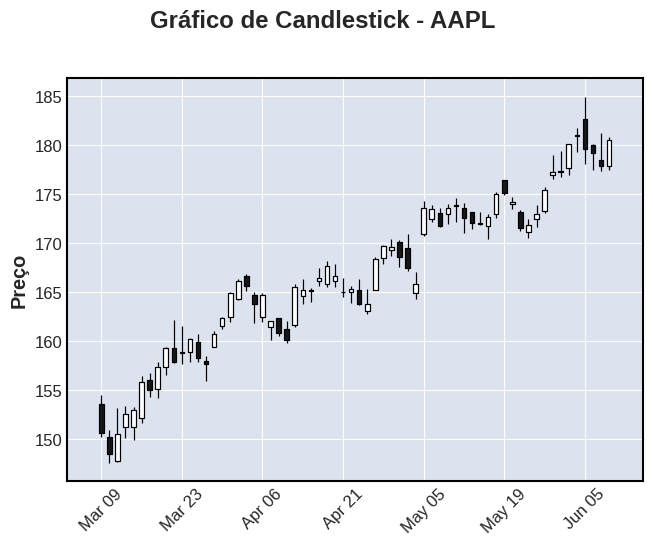

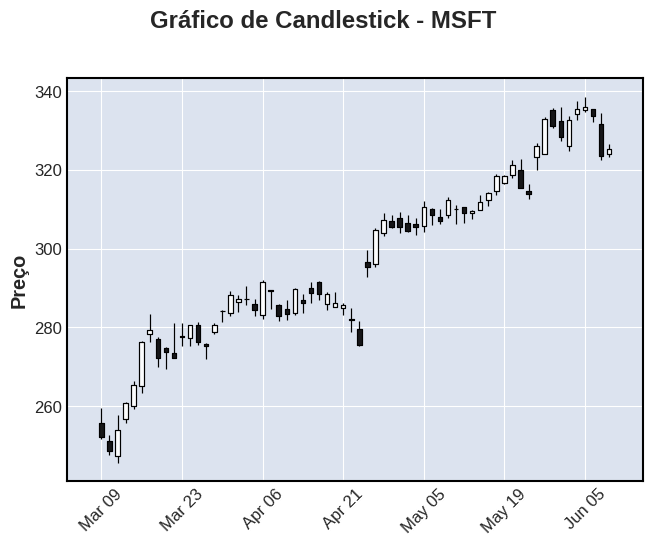

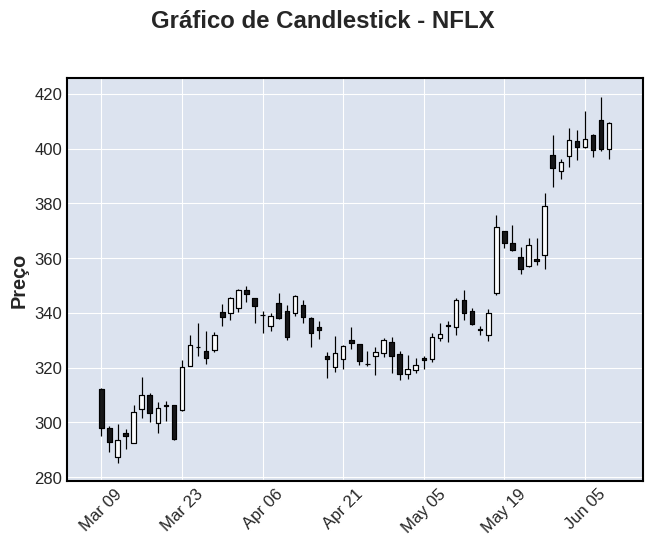

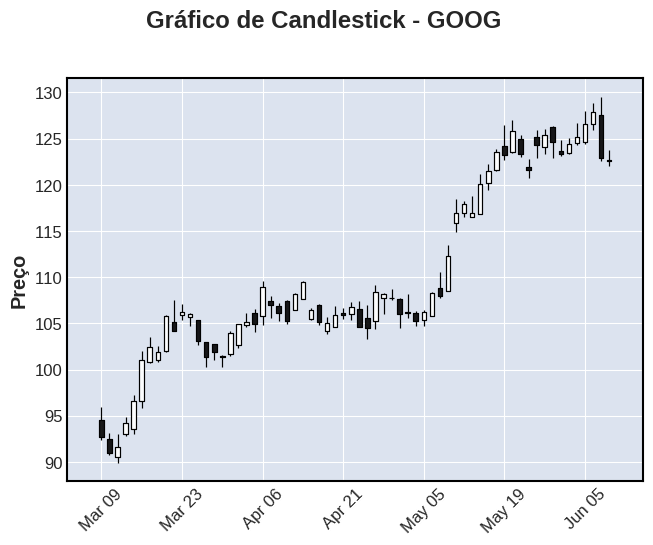

In [17]:
# Visualização candlestic por empresa

for empresa in dados_acoes['Ticker'].unique():
  dados = dados_acoes.loc[dados_acoes['Ticker'] == empresa].copy()
  plotar_grafico_candlestic(dados, empresa)